Fit a Gensim LDA topic model on Amazon Reviews
Select appropriate number of topics
Create some dope visualization of the topics
Write a few bullets on your findings in markdown at the end
Note: You don't have to use generators for this assignment

In [2]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

C:\Users\zebfr\Anaconda3\envs\U4-S1-NLP\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [9]:
path = './data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'

In [3]:
df_Ama = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [30]:
list(df_Ama)

['id',
 'dateAdded',
 'dateUpdated',
 'name',
 'asins',
 'brand',
 'categories',
 'primaryCategories',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'reviews.date',
 'reviews.dateSeen',
 'reviews.didPurchase',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.username',
 'sourceURLs',
 'tokens']

In [31]:
df_Ama['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [12]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)


In [14]:

# Tokenizer Pipe

tokens = []

""" Make them tokens """
for df in tokenizer.pipe(df_Ama['reviews.title'], batch_size=500):
    df_tokens = [token.text for token in df]
    tokens.append(df_tokens)

df_Ama['tokens'] = tokens

In [17]:
title = df_Ama['tokens']

In [18]:
len(title)

28332

In [19]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(title)

In [20]:
id2word.token2id['girl']

5047

In [21]:
id2word[869]

'now.'

In [23]:
import sys
sys.getsizeof(id2word)

56

In [24]:
len(id2word.keys())

6227

In [25]:
 #Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

In [26]:
len(id2word.keys())

1580

In [27]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
# Although abstracted away - tokenization IS happening in the doc_stream f(x)
corpus = [id2word.doc2bow(text) for text in title]

In [28]:
corpus[0][:10]

[(0, 2),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

In [32]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 6,
                   passes=10,
                   workers=4
                  )

In [33]:
lda.print_topics()

[(0,
  '0.064*"batteries" + 0.036*"Four" + 0.029*"Kindle" + 0.023*"a" + 0.022*"at" + 0.021*"great" + 0.020*"..." + 0.020*"are" + 0.020*"fire" + 0.020*"Nice"'),
 (1,
  '0.073*"it" + 0.064*"great" + 0.052*"to" + 0.043*"Excellent" + 0.033*"use" + 0.032*"and" + 0.032*"Awesome" + 0.032*"tablet" + 0.031*"for" + 0.031*"loves"'),
 (2,
  '0.229*"Great" + 0.159*"for" + 0.110*"tablet" + 0.050*"Good" + 0.049*"kids" + 0.033*"Tablet" + 0.030*"the" + 0.027*"price" + 0.022*"product" + 0.014*"a"'),
 (3,
  '0.360*"Stars" + 0.295*"Five" + 0.064*"Fire" + 0.029*"Amazon" + 0.020*"-" + 0.017*"8" + 0.017*"HD" + 0.015*"Kindle" + 0.014*"Batteries" + 0.012*"Great!"'),
 (4,
  '0.060*"the" + 0.047*"for" + 0.042*"I" + 0.035*"my" + 0.034*"Perfect" + 0.032*"Love" + 0.025*"gift" + 0.021*"and" + 0.020*"of" + 0.020*"a"'),
 (5,
  '0.064*"good" + 0.039*"as" + 0.031*"Very" + 0.030*"old" + 0.025*"year" + 0.020*"it!" + 0.019*"Not" + 0.018*"but" + 0.018*"a" + 0.018*"not"')]

In [34]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [35]:
topics = [' '.join(t[0:5]) for t in words]

In [36]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
batteries Four Kindle a at

------ Topic 1 ------
it great to Excellent use

------ Topic 2 ------
Great for tablet Good kids

------ Topic 3 ------
Stars Five Fire Amazon -

------ Topic 4 ------
the for I my Perfect

------ Topic 5 ------
good as Very old year



In [ ]:
lda[corpus[0]]

## visuals 

In [37]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [38]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\zebfr\Anaconda3\envs\U4-S1-NLP\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.141031 -0.291655       1        1  25.172039
4     -0.101517  0.097479       2        1  18.383396
5     -0.086491  0.211456       3        1  15.897015
0      0.032981  0.148973       4        1  15.653318
1     -0.144579 -0.094660       5        1  13.167175
3      0.440637 -0.071594       6        1  11.727052, topic_info=     Category         Freq        Term        Total  loglift  logprob
230   Default  4072.000000       Stars  4072.000000  30.0000  30.0000
199   Default  5515.000000       Great  5515.000000  29.0000  29.0000
755   Default  3300.000000        Five  3300.000000  28.0000  28.0000
1316  Default  3056.000000      tablet  3056.000000  27.0000  27.0000
18    Default  5242.000000         for  5242.000000  26.0000  26.0000
99    Default   925.000000          it   925.000000  25.0000  25.0000
36    Default   985.000000   batteries   985.000000  24.0000  24.0000
835   Default  1179.000000        kids  1179.000000  23.0000  23.0000
77    Default  1106.000000        good  1106.000000  22.0000  22.0000
647   Default   718.000000        Fire   718.000000  21.0000  21.0000
112   Default  1406.000000       great  1406.000000  20.0000  20.0000
14    Default  1990.000000         the  1990.000000  19.0000  19.0000
2     Default   781.000000           I   781.000000  18.0000  18.0000
253   Default  1508.000000        Good  1508.000000  17.0000  17.0000
385   Default   545.000000   Excellent   545.000000  16.0000  16.0000
34    Default   595.000000          as   595.000000  15.0000  15.0000
1358  Default   793.000000      Tablet   793.000000  14.0000  14.0000
606   Default   597.000000     Perfect   597.000000  13.0000  13.0000
23    Default  1166.000000          to  1166.000000  12.0000  12.0000
759   Default   535.000000        Four   535.000000  11.0000  11.0000
849   Default   780.000000        Love   780.000000  10.0000  10.0000
520   Default   479.000000        Very   479.000000   9.0000   9.0000
201   Default   421.000000         use   421.000000   8.0000   8.0000
217   Default   453.000000         old   453.000000   7.0000   7.0000
441   Default   404.000000     Awesome   404.000000   6.0000   6.0000
1272  Default   398.000000       loves   398.000000   5.0000   5.0000
87    Default   660.000000      Amazon   660.000000   4.0000   4.0000
245   Default   434.000000        gift   434.000000   3.0000   3.0000
1222  Default   785.000000      Kindle   785.000000   2.0000   2.0000
218   Default   373.000000        year   373.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
765    Topic6    23.211018        Gets    24.063219   2.1072  -6.1793
1368   Topic6    22.664953         Hd8    23.561493   2.1045  -6.2031
932    Topic6    20.498108   satisfied    21.358425   2.1022  -6.3036
901    Topic6    42.441452   Grandkids    44.238091   2.1018  -5.5758
322    Topic6    28.733187  Batteries.    30.061972   2.0981  -5.9659
1201   Topic6    15.791934     helpful    16.645035   2.0907  -6.5644
1100   Topic6    15.260431    keyboard    16.114346   2.0888  -6.5987
1202   Topic6    14.818994    helpful.    15.671236   2.0874  -6.6280
583    Topic6    14.773811  complaints    15.626867   2.0871  -6.6311
279    Topic6    14.908194        must    15.772297   2.0869  -6.6220
882    Topic6    12.170861    Product,    13.026514   2.0753  -6.8249
1042   Topic6    11.469925       Nice!    12.321356   2.0717  -6.8842
1351   Topic6    21.359688        16gb    23.064056   2.0665  -6.2624
1048   Topic6    10.705199       smart    11.560595   2.0664  -6.9532
1372   Topic6    10.578793         8HD    11.430137   2.0659  -6.9651
760    Topic6    10.637966  packaging.    11.509807   2.0645  -6.9595
1133   Topic6     9.868134        cool    10.722212   2.0603  -7.0346
1442   Topic6     9.351057          Hd    10.202680   2.0561  -7.0884
238    Topic6   191.11807

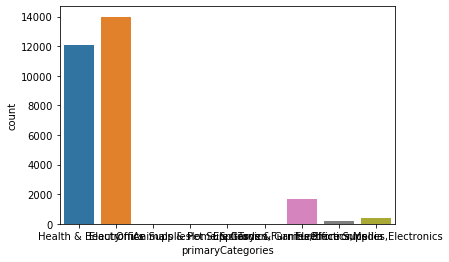

In [40]:

import seaborn as sns

sns.countplot(df_Ama['primaryCategories']);

In [41]:
df_Ama['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [42]:

# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df_Ama['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('Great', 6408),
 ('for', 5446),
 ('Stars', 4860),
 ('Five', 3940),
 ('tablet', 3079),
 ('the', 2124),
 ('Good', 1788),
 ('a', 1484),
 ('great', 1386),
 ('kids', 1273)]

In [43]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [44]:
# Use the Function
wc = count(df_Ama['tokens'])

In [45]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
245,Great,6362,6408,1.0,0.061851,0.061851,0.224552
19,for,5386,5446,2.0,0.052566,0.114418,0.190103
297,Stars,4860,4860,3.0,0.046910,0.161327,0.171537
1490,Five,3940,3940,4.0,0.038030,0.199357,0.139065
4387,tablet,3076,3079,5.0,0.029719,0.229076,0.108570


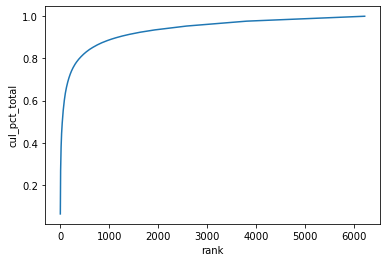

In [46]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [47]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.40325087111377084

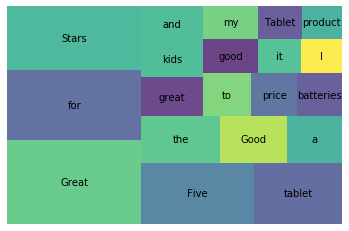

In [48]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [49]:
STOP_WORDS = nlp.Defaults.stop_words.union(['batteries','I', 'amazon','a','to','the','and', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this',])

In [51]:

tokens = []

for doc in tokenizer.pipe(df_Ama['reviews.text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df_Ama['tokens'] = tokens

In [53]:
wc = count(df_Ama['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
75,great,7187,8183,1.0,0.023959,0.023959,0.253671
67,good,4633,5148,2.0,0.015073,0.039032,0.163525
7808,tablet,3920,4714,3.0,0.013802,0.052834,0.138359
105,love,3154,3458,4.0,0.010125,0.062958,0.111323
107,use,2881,3233,5.0,0.009466,0.072424,0.101687


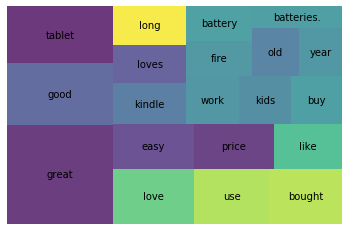

In [54]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

C:\Users\zebfr\Anaconda3\envs\U4-S1-NLP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


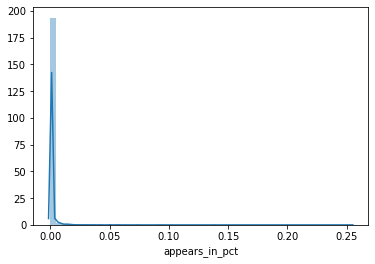

In [55]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

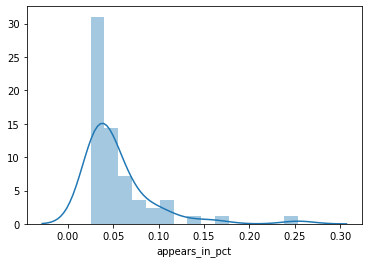

In [56]:
#Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct']);

In [57]:
wc = count(df_Ama['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

KeyError: 'stems'